# Part 1: Explore Data

In [2]:
import pandas as pd

banknote_raw = pd.read_csv('data_banknote_authentication.csv')
banknote_raw.head()

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [3]:
banknote_raw.tail()

,3.6216,8.6661,-2.8073,-0.44699,0
1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,-3.56370,-8.38270,12.3930,-1.28230,1
1370,-2.54190,-0.65804,2.6842,1.19520,1


In [4]:
import numpy as np

banknote = np.array(banknote_raw)
print("V1 mean: %f" % banknote[:,0].mean())
print("V1 std:  %f" % banknote[:,0].std())
print("V2 mean: %f" % banknote[:,1].mean())
print("V2 std:  %f" % banknote[:,1].std())
print("V3 mean: %f" % banknote[:,2].mean())
print("V3 std:  %f" % banknote[:,2].std())

V1 mean: 0.431410
V1 std:  2.841458
V2 mean: 1.917434
V2 std:  5.866218
V3 mean: 1.400694
V3 std:  4.308533


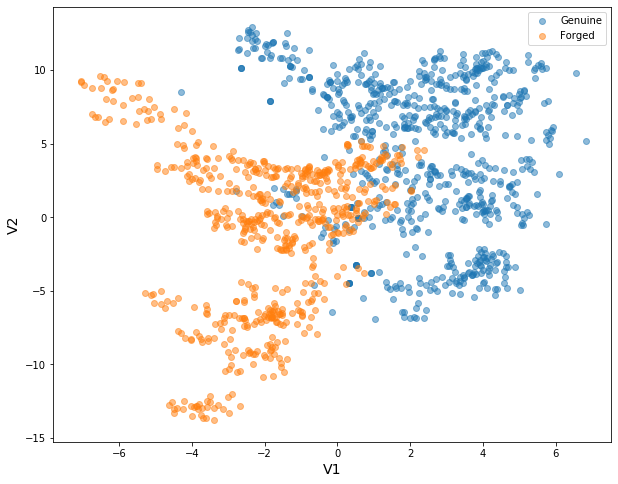

In [7]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

genuine = banknote[banknote[:,4] == 0]
forged = banknote[banknote[:,4] == 1]

plt.figure(figsize=(10,8))
plt.scatter(genuine[:,0], genuine[:,1], alpha=0.5, c="C0", label="Genuine")
plt.scatter(forged[:,0], forged[:,1], alpha=0.5, c="C1", label="Forged")
plt.xlabel("V1", fontsize=14)
plt.ylabel("V2", fontsize=14)
plt.legend()
plt.savefig('banknote_data')

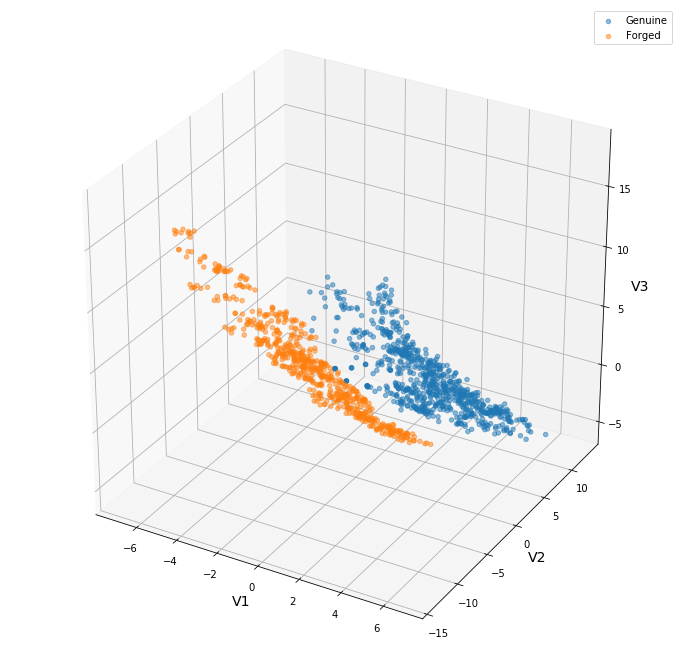

In [6]:
from mpl_toolkits import mplot3d

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection="3d")

genuine = banknote[banknote[:,4] == 0]
forged = banknote[banknote[:,4] == 1]

ax.scatter3D(genuine[:,0], genuine[:,1], genuine[:,2], c="C0", alpha=0.5, label="Genuine")
ax.scatter3D(forged[:,0], forged[:,1], forged[:,2], c="C1", alpha=0.5, label="Forged")
ax.set_xlabel("V1", fontsize=14)
ax.set_ylabel("V2", fontsize=14)
ax.set_zlabel("V3", fontsize=14)
ax.legend()

#ax.scatter3D(km_res.cluster_centers_[:,0],km_res.cluster_centers_[:,1],km_res.cluster_centers_[:,2],s=1000,c="C2")

# Part 2: K-Means Clustering

In [8]:
# First standardise data
import numpy as np

banknote_std = (banknote - np.mean(banknote, axis=0)) / np.std(banknote, axis=0)
banknote_std[:,4] = banknote[:,4]

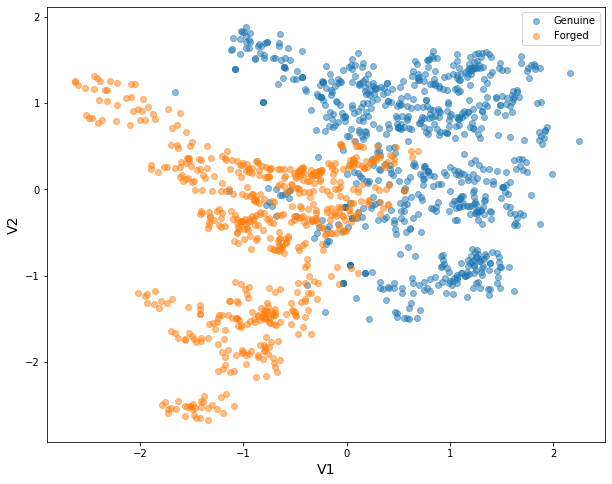

In [9]:
# Plot standardised data
genuine_std = banknote_std[banknote_std[:,4] == 0]
forged_std = banknote_std[banknote_std[:,4] == 1]

plt.figure(figsize=(10,8))
plt.scatter(genuine_std[:,0], genuine_std[:,1], alpha=0.5, c="C0", label="Genuine")
plt.scatter(forged_std[:,0], forged_std[:,1], alpha=0.5, c="C1", label="Forged")
plt.xlabel("V1", fontsize=14)
plt.ylabel("V2", fontsize=14)
#plt.scatter(km_res_2.cluster_centers_[:,0], km_res_2.cluster_centers_[:,1], c="black", marker="*", s=200, label="Cluster Centers")
plt.legend()

In [10]:
# Set up function for grading classification
def grade_classification(km_res, original):
    correct = 0
    for i in range(0,len(original)):
        if km_res.labels_[i] == original[i,4]:
            correct = correct + 1

    return correct / len(original) * 100

In [11]:
# Do clustering
from sklearn.cluster import KMeans
import numpy as np

v1_v2 = np.column_stack((banknote_std[:,0],banknote_std[:,1]))
v1_v2_v3 = np.column_stack((banknote_std[:,0],banknote_std[:,1],banknote_std[:,2])) # Could also try with 3 features

# Repeat clustering n times to see if stable
n = 10

cluster_centres = []
for i in range(0,n):
    while True:
        km_res_2 = KMeans(n_clusters=2, n_init=10, max_iter=1000).fit(v1_v2)
        result = grade_classification(km_res_2, banknote_std)

        # Make sure that the clusters are labelled the same as the original data set
        # (In which case the result should be at least better than chance, i.e. > 50%!)
        if result > 50:
            break;
    cluster_centres.append(km_res_2.cluster_centers_)

# Output generated cluster centres
for i in cluster_centres:
    print(str(i[0]) + str(i[1])) 

[0.65555703 0.4861832 ][-0.84991816 -0.63032797]
[0.65555703 0.4861832 ][-0.84991816 -0.63032797]
[0.65555703 0.4861832 ][-0.84991816 -0.63032797]
[0.65750558 0.4876174 ][-0.84740285 -0.62844847]
[0.65555703 0.4861832 ][-0.84991816 -0.63032797]
[0.65555703 0.4861832 ][-0.84991816 -0.63032797]
[0.65555703 0.4861832 ][-0.84991816 -0.63032797]
[0.65750558 0.4876174 ][-0.84740285 -0.62844847]
[0.65750558 0.4876174 ][-0.84740285 -0.62844847]
[0.65555703 0.4861832 ][-0.84991816 -0.63032797]


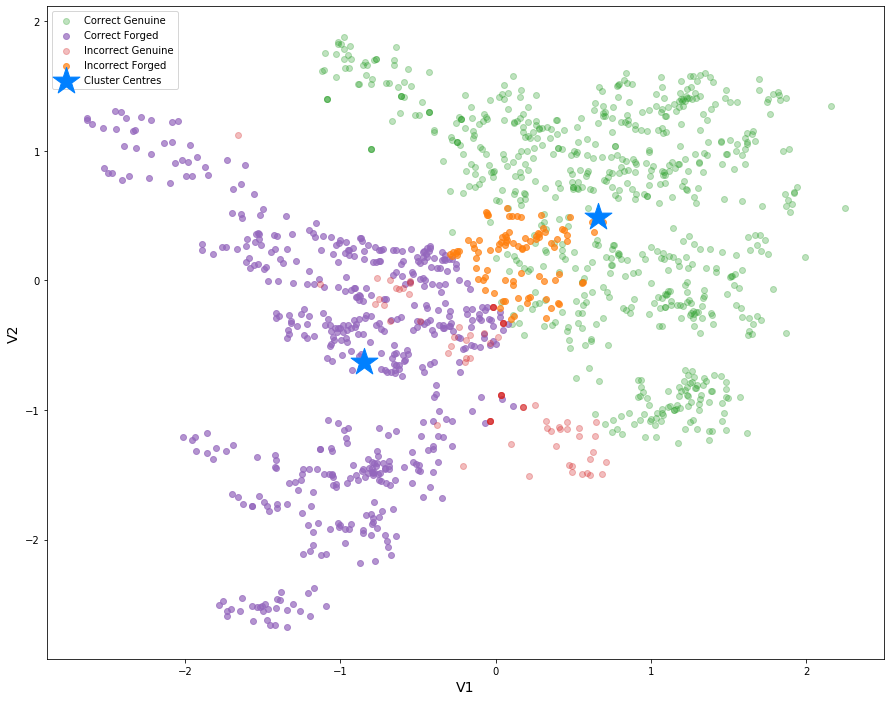

In [12]:
# Plot correcly/incorrectly clustered points to visualise accuracy
plt.figure(figsize=(15,12))
plt.xlabel("V1", fontsize=14)
plt.ylabel("V2", fontsize=14)

correct_genuine = []
correct_forged = []
incorrect_genuine = []
incorrect_forged = []

for i in range(0,len(banknote_std)):
    if km_res_2.labels_[i] == banknote_std[i,4]:
        if banknote_std[i,4] == 0:
            correct_genuine.append([banknote_std[i,0],banknote_std[i,1]])
        else:
            correct_forged.append([banknote_std[i,0],banknote_std[i,1]])
    else:
        if banknote_std[i,4] == 0:
            incorrect_genuine.append([banknote_std[i,0],banknote_std[i,1]])
        else:
            incorrect_forged.append([banknote_std[i,0],banknote_std[i,1]])

correct_genuine = np.array(correct_genuine)
correct_forged = np.array(correct_forged)
incorrect_genuine = np.array(incorrect_genuine)   
incorrect_forged = np.array(incorrect_forged)  
        
plt.scatter(correct_genuine[:,0], correct_genuine[:,1], alpha=0.3, c="C2", label="Correct Genuine")
plt.scatter(correct_forged[:,0], correct_forged[:,1], alpha=0.7, c="C4", label="Correct Forged")
plt.scatter(incorrect_genuine[:,0], incorrect_genuine[:,1], alpha=0.3, c="C3", label="Incorrect Genuine")
plt.scatter(incorrect_forged[:,0], incorrect_forged[:,1], alpha=0.7, c="C1", label="Incorrect Forged")
plt.scatter(km_res_2.cluster_centers_[:,0], km_res_2.cluster_centers_[:,1], c="#0080FF", marker="*", 
            s=800, label="Cluster Centres")
plt.legend()
plt.savefig('banknote_clustering')

In [13]:
# Output overall accuracy
correct = grade_classification(km_res_2, banknote_std)
incorrect = 100 - correct
correct

87.81911013858497

Text(0, 0.5, 'Classification Accuracy (%)')

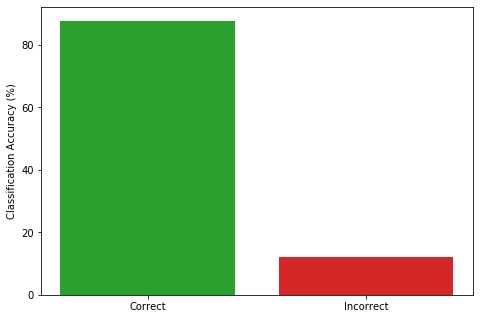

In [14]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(['Correct', 'Incorrect'],[correct, incorrect],color=['C2','C3'])
ax.set_ylabel('Classification Accuracy (%)')

In [15]:
len(banknote[banknote[:,4]==1])

610